# Diabetes Dataset 
    * Use Logistic Regression and KNN Classification

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use("seaborn-whitegrid")
pd.set_option('display.float_format', '{:.3f}'.format)

# Read Dataset

In [2]:
data = pd.read_csv("diabetes.csv")

In [1]:
pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master


  Created wheel for jupyter-contrib-nbextensions: filename=jupyter_contrib_nbextensions-0.5.3-py2.py3-none-any.whl size=23430522 sha256=e588b8fbad64eb1a82b48f4f67ef9d94e3a07fcecd658af44a85d8e409602caa
  Stored in directory: C:\Users\gamze\AppData\Local\Temp\pip-ephem-wheel-cache-7bz_3jul\wheels\99\83\3a\b0286883fdb58ca563ced4057b233e5389fd8b6b7ae87fcdd9
Successfully built jupyter-contrib-nbextensions
  Attempting uninstall: jupyter-contrib-nbextensions
    Found existing installation: jupyter-contrib-nbextensions 0.5.1
    Uninstalling jupyter-contrib-nbextensions-0.5.1:
      Successfully uninstalled jupyter-contrib-nbextensions-0.5.1
Note: you may need to restart the kernel to use updated packages.


# Data Preparation

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,627.000,50,1
1,1,85,66,29,0,26.600,351.000,31,0
2,8,183,64,0,0,23.300,672.000,32,1
3,1,89,66,23,94,28.100,167.000,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.900,171.000,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,245.000,30,0
766,1,126,60,0,0,30.100,349.000,47,1
767,1,93,70,31,0,30.400,315.000,23,0


In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,347.079,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,254.432,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.100,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,165.000,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,295.500,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,527.250,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,997.000,81.000,1.000


# Visulazations

In [8]:
# target value = outcome

In [9]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

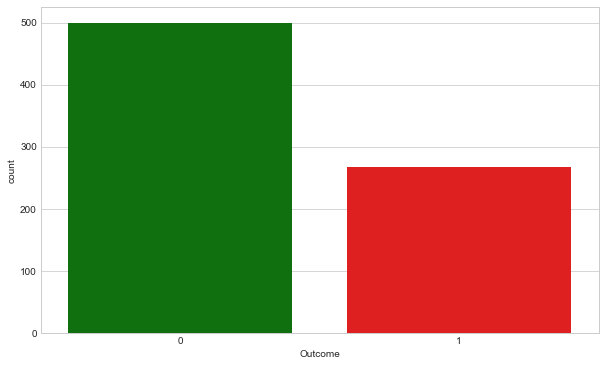

In [10]:
colors = ["green", "red"]
sns.countplot(data.Outcome, palette= colors)
plt.show()

In [11]:
D = data[data.Outcome == 1]  ##diabetes
N = data[data.Outcome == 0]  ## not diabetes

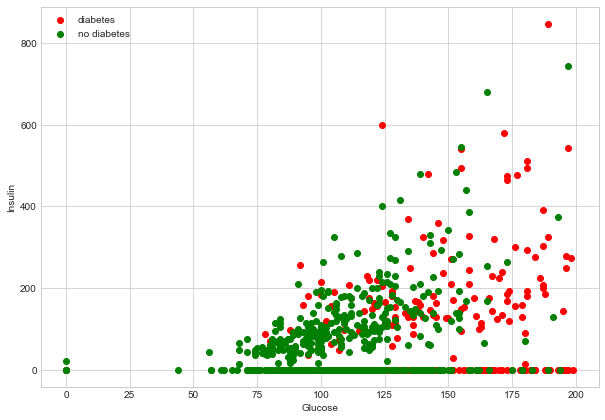

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(D.Glucose, D.Insulin, color= "red", label= "diabetes")
plt.scatter(N.Glucose, N.Insulin, color= "green", label= "no diabetes")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

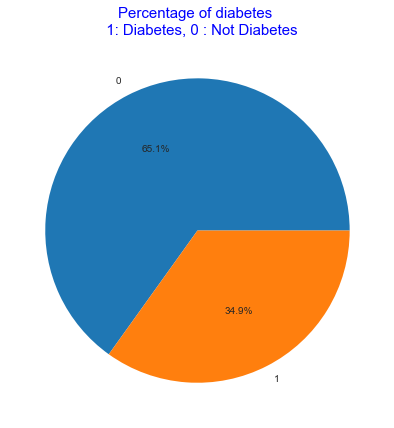

In [13]:
labels = data.Outcome.value_counts().index
explode = [0, 0]
sizes = data.Outcome.value_counts().values

# visual
plt.figure(figsize= (7, 7))
plt.pie(sizes, explode= explode, labels= labels, autopct = "%1.1f%%")
plt.title("Percentage of diabetes \n  1: Diabetes, 0 : Not Diabetes", color = "blue", fontsize = 15)
plt.show()

# Statistical Analysis

In [14]:
data.corr()['Outcome'].drop('Outcome').sort_values(ascending=False)

Glucose                    0.467
BMI                        0.293
Age                        0.238
Pregnancies                0.222
Insulin                    0.131
DiabetesPedigreeFunction   0.092
SkinThickness              0.075
BloodPressure              0.065
Name: Outcome, dtype: float64

# Determine Dependent and Independent Variables

In [15]:
y = data.Outcome
X = data.drop(columns = "Outcome")

# Scaling the Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X = scaler.fit_transform(X)

# Train - Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 101)

## Model Fitting and Compare Actual and Predicted Labels

In [20]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = log_model.predict(X_test)
y_train_pred = log_model.predict(X_train)

## Error Metrics

In [22]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

## Evaluate Model

In [23]:
accuracy_score(y_test, y_pred)

0.7727272727272727

In [24]:
accuracy_score(y_train, y_train_pred)

0.7752442996742671

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[86, 17],
       [18, 33]], dtype=int64)

In [26]:
confusion_matrix(y_train, y_train_pred)

array([[350,  47],
       [ 91, 126]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.66      0.65      0.65        51

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [28]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       397
           1       0.73      0.58      0.65       217

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614



In [29]:
logr_scores = {"logr_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
    "precision_score" : precision_score(y_train, y_train_pred),
    "recall_score" : recall_score(y_train, y_train_pred),
    "f1_score" : f1_score(y_train, y_train_pred, average = "weighted"),}, 

    "logr_test": {"accuracy" : accuracy_score(y_test, y_pred),
    "precision_score" : precision_score(y_test, y_pred),
    "recall_score" : recall_score(y_test, y_pred),
    "f1_score" : f1_score(y_test, y_pred, average = "weighted")
   }}
logr =pd.DataFrame(logr_scores)

In [30]:
logr

,logr_train,logr_test
accuracy,0.775,0.773
precision_score,0.728,0.660
recall_score,0.581,0.647
f1_score,0.768,0.772



# KNN_Classifier Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn_model = KNeighborsClassifier(n_neighbors= 3)

In [33]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
y_pred = knn_model.predict(X_test)
y_train_pred = knn_model.predict(X_train)

In [35]:
accuracy_score(y_test, y_pred)

0.7662337662337663

In [36]:
accuracy_score(y_train, y_train_pred)

0.8273615635179153

In [37]:
test_error_rates = []
for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(X_train, y_train)
    
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

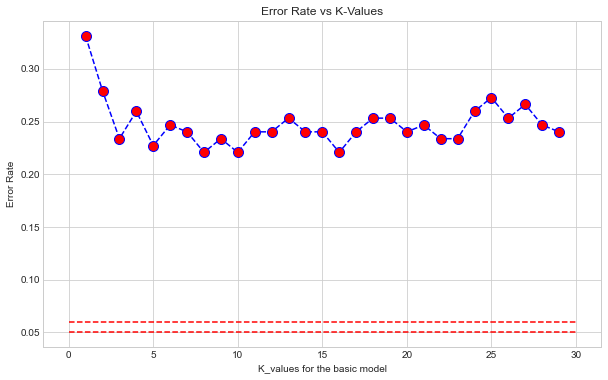

In [38]:
plt.plot(range(1, 30), test_error_rates, color = "blue", linestyle = "--", marker = "o",
         markerfacecolor= "red", markersize= 10)
plt.title("Error Rate vs K-Values")
plt.xlabel("K_values for the basic model")
plt.ylabel("Error Rate")
plt.hlines(y= 0.05, xmin= 0, xmax= 30,colors = "r", linestyles= "--")
plt.hlines(y= 0.06, xmin= 0, xmax= 30,colors = "r", linestyles= "--")
plt.show()


# Gridseach Method for Choosing Optimum K Value

In [39]:
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsClassifier()
k_values = range(1, 30)
param_grid = {"n_neighbors": k_values, "weights": ["uniform", "distance"]}

In [40]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv= 10, scoring = "accuracy")

In [41]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [42]:
knn_grid_model.best_estimator_    

KNeighborsClassifier(n_neighbors=19, weights='distance')

In [43]:
# With k = 21
knn = KNeighborsClassifier(n_neighbors= 8)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print("With K = 21")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

With K = 21


[[94  9]
 [25 26]]


              precision    recall  f1-score   support

           0       0.79      0.91      0.85       103
           1       0.74      0.51      0.60        51

    accuracy                           0.78       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.78      0.77       154



In [44]:
knn_scores = {"knn_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
    "precision_score" : precision_score(y_train, y_train_pred),
    "recall_score" : recall_score(y_train, y_train_pred),
    "f1_score" : f1_score(y_train, y_train_pred, average = "weighted")}, 

    "knn_test": {"accuracy" : accuracy_score(y_test, y_pred),
    "precision_score" : precision_score(y_test, y_pred),
    "recall_score" : recall_score(y_test, y_pred),
    "f1_score" : f1_score(y_test, y_pred, average = "weighted")}}
knn =pd.DataFrame(knn_scores)

In [45]:
knn

,knn_train,knn_test
accuracy,0.827,0.766
precision_score,0.779,0.683
recall_score,0.714,0.549
f1_score,0.826,0.759


# Comparison of 2 Models

In [46]:
pd.concat([logr, knn], axis= 1)


,logr_train,logr_test,knn_train,knn_test
accuracy,0.775,0.773,0.827,0.766
precision_score,0.728,0.660,0.779,0.683
recall_score,0.581,0.647,0.714,0.549
f1_score,0.768,0.772,0.826,0.759


In [47]:
#logresssion is the better one with a higher recall value.  Because we are trying to reduce false negatives  

# Improve Model 
    * Use Cross Validate
    * Use Grid-Search

# Cross_validate the LogRegression Model

In [48]:
from sklearn.model_selection import cross_val_score, cross_validate

In [49]:
model = LogisticRegression()
scores = cross_validate(model, X_train, y_train, scoring = ["recall_weighted"], cv = 10)



In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       103
           1       0.68      0.55      0.61        51

    accuracy                           0.77       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



In [51]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       397
           1       0.78      0.71      0.75       217

    accuracy                           0.83       614
   macro avg       0.81      0.80      0.81       614
weighted avg       0.83      0.83      0.83       614



In [52]:
##GridSearch for LogRession Model

In [53]:
from sklearn.model_selection import GridSearchCV
log_grid = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':range(0, 25)}
log_grid_model = GridSearchCV(log_grid, param_grid = grid_values,scoring = 'recall')
log_grid_model.fit(X_train, y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': range(0, 25), 'penalty': ['l1', 'l2']},
             scoring='recall')

In [54]:
y_pred = log_grid_model.predict(X_test)
y_train_pred = log_grid_model.predict(X_train)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.66      0.65      0.65        51

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [56]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       397
           1       0.73      0.58      0.65       217

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614



In [57]:
#With the help of Grid Search and Cross Validation, we could iuncrease the recall value of the default model. 